# 🦠🦠🦠🦠Malaria Image Cell Classification: Parasitized or Uninfected🦟🦟🦟🦟

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [5]:
# Defining variables
BATCH_SIZE = 32
IMAGE_SIZE = 256
EPOCHS = 50
CHANNELS = 2

In [6]:
# Retrieve images and divide into three classes
dataset = tf.keras.preprocessing.image_dataset_from_directory(r'C:\Users\PC\Documents\Data-Science-Tasks\Malaria-ImageCLassification\cell_images',
                                                              shuffle = True,
                                                              image_size = (IMAGE_SIZE, IMAGE_SIZE),
                                                              batch_size = BATCH_SIZE
)

Found 27558 files belonging to 2 classes.


In [7]:
class_names = dataset.class_names
class_names

['Parasitized', 'Uninfected']

(32, 256, 256, 3)
[0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1]


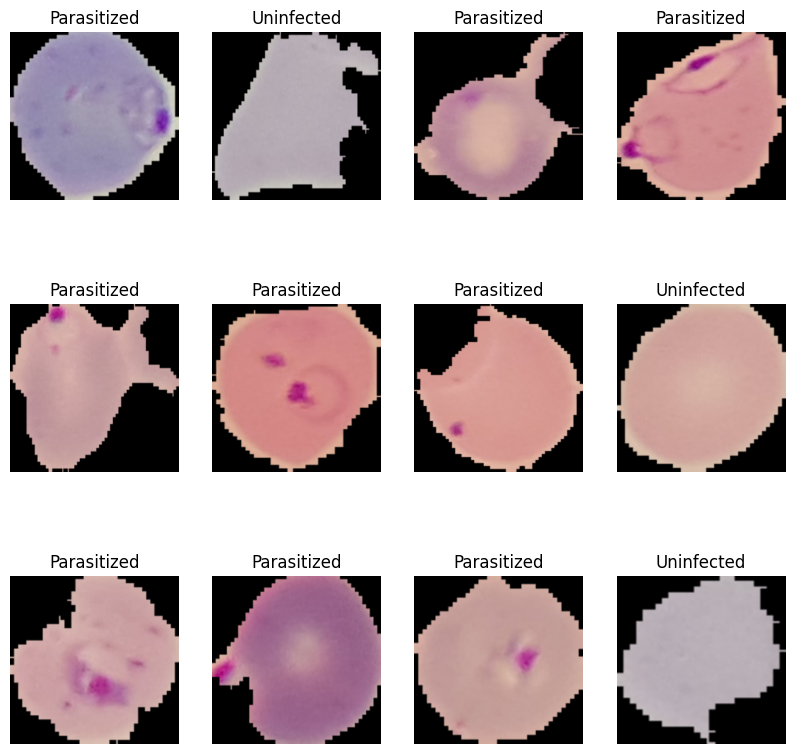

In [8]:
plt.figure(figsize=(10,10))
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.numpy().shape)
    print(labels_batch.numpy())
    for i in range(12):
        ax = plt.subplot(3,4, i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[labels_batch[i]])
        plt.axis('off')

In [9]:
# Convert data into train test split
# 80% training 10% validation 10% Testing
train_size = 0.8
len(dataset)*train_size

689.6

In [10]:
train_ds = dataset.take(689)
len(train_ds)

689

In [11]:
test_ds = dataset.skip(689)
len(test_ds)

173

In [12]:
val_size = 0.1
len(dataset)*val_size

86.2

In [13]:
val_ds = train_ds.take(86)
len(val_ds)

86

In [15]:
#function that returns train, validation and test split
def get_dataset_partitions_tf(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 5000):
    assert(train_split + test_split + val_split) == 1
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
        
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).take(val_size)
    return train_ds, val_ds, test_ds

In [16]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [17]:
len(val_ds)

86